In [1]:
import os, sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 

sns.set()
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('spam.tsv', sep='\t')

In [3]:
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [7]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.3+ KB


In [11]:
df['label'].value_counts(normalize=True)*100

label
ham     86.593683
spam    13.406317
Name: proportion, dtype: float64

In [13]:
#its a imbalalnce data
ham = df[df['label']=='ham']
spam = df[df['label']=='spam']


In [15]:
ham.shape


(4825, 4)

In [17]:
spam.shape

(747, 4)

In [19]:
#undersampling because it can be used for text analytics
ham1 = ham.sample(spam.shape[0])
ham1

,label,message,length,punct
2800,ham,I've told him that i've returned it. That shou...,63,4
3966,ham,Love you aathi..love u lot..,28,4
3269,ham,Which is why i never wanted to tell you any of...,111,4
2139,ham,K still are you loving me.,26,1
397,ham,Was actually sleeping and still might when u c...,118,4
...,...,...,...,...
2737,ham,Really? I crashed out cuddled on my sofa.,41,2
668,ham,This pay is &lt;DECIMAL&gt; lakhs:),37,6
5162,ham,Just send a text. We'll skype later.,36,3
1281,ham,Oh ho. Is this the first time u use these type...,55,1


In [21]:
#balance your data whrere target value is spam or ham
df = pd.concat([ham1, spam], ignore_index=True)
df.shape

(1494, 4)

In [23]:
df['label'].value_counts()

label
ham     747
spam    747
Name: count, dtype: int64

(array([ 1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  3.,  0.,  1.,  1.,
         2.,  1.,  1.,  4.,  4.,  2.,  0.,  0.,  1.,  0.,  1.,  3.,  1.,
         4.,  4.,  6.,  3.,  2.,  0.,  6.,  2.,  3.,  0.,  5.,  0.,  1.,
         5.,  4.,  9.,  2.,  4.,  9.,  6.,  6.,  3., 10.,  1., 11., 10.,
         5., 10.,  3., 10., 13., 14., 27., 18., 23., 25., 27., 32., 32.,
        18., 49., 58., 68., 76., 65.,  6.,  8.,  1.,  2.,  2.,  2.,  2.,
         1.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 13. ,  15.1,  17.2,  19.3,  21.4,  23.5,  25.6,  27.7,  29.8,
         31.9,  34. ,  36.1,  38.2,  40.3,  42.4,  44.5,  46.6,  48.7,
         50.8,  52.9,  55. ,  57.1,  59.2,  61.3,  63.4,  65.5,  67.6,
         69.7,  71.8,  73.9,  76. ,  78.1,  80.2,  82.3,  84.4,  86.5,
         88.6,  90.7,  92.8,  94.9,  97. ,  99.1, 101.2, 103.3, 105.4,
        107.5, 109.6, 111.7, 113.8, 115.9, 118. , 120.1, 122.2, 124.3,
        

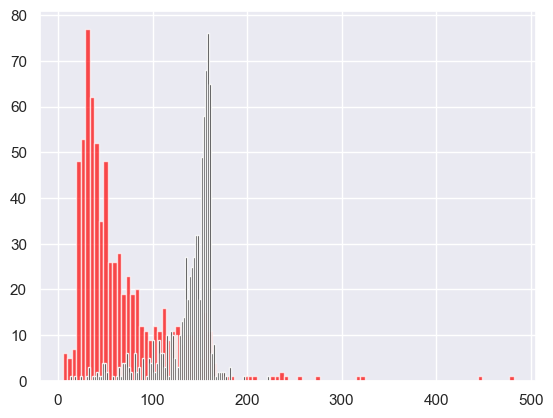

In [25]:
plt.hist(df[df['label']=='ham']['length'], bins = 100, alpha =0.7, color='red')
plt.hist(df[df['label']=='spam']['length'], bins = 100, alpha =0.9, color='black')

from the above chart we could see the length of the mail for Ham is larger than Spam mails ham touching upto 120 and spam is touching 78

(array([ 23.,   0.,   0.,  26.,   0.,   0.,   0.,  73.,   0.,   0.,   0.,
        115.,   0.,   0.,   0.,  77.,   0.,   0.,   0.,  67.,   0.,   0.,
          0.,  86.,   0.,   0.,  74.,   0.,   0.,   0.,  66.,   0.,   0.,
          0.,  49.,   0.,   0.,   0.,  27.,   0.,   0.,   0.,  17.,   0.,
          0.,   0.,  22.,   0.,   0.,   0.,  14.,   0.,   0.,   2.,   0.,
          0.,   0.,   2.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   2.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 0.  ,  0.26,  0.52,  0.78,  1.04,  1.3 ,  1.56,  1.82,  2.08,
         2.34,  2.6 ,  2.86,  3.12,  3.38,  3.64,  3.9 ,  4.16,  4.42,
         4.68,  4.94,  5.2 ,  5.46,  5.72,  5.98,  6.24,  6.5 ,  6.76,
         7.02,  7.28,  7.54,  7.8 ,  8.06,  8.32,  8.58,  8.84,  9.1 ,
         9.36,  9.62,  9.88, 10.14

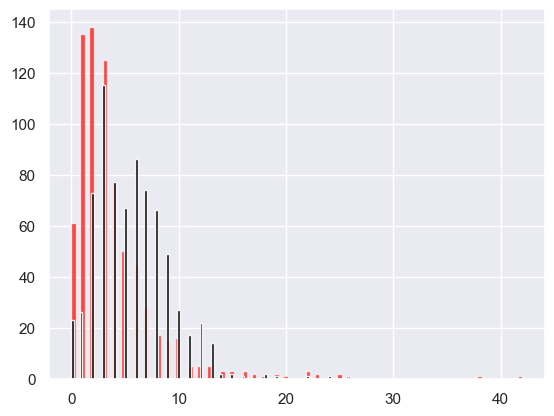

In [28]:
plt.hist(df[df['label']=='ham']['punct'], bins = 100, alpha =0.7, color='red')
plt.hist(df[df['label']=='spam']['punct'], bins = 100, alpha =0.9, color='black')

from the above chart we could observe that in punctuations are high for Ham touching 160 and spam is followed by maximum of 120

In [31]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(df['message'],df['label'], test_size=0.3, random_state=42)

In [35]:
x_train.shape

(1045,)

In [37]:
#buildng NLP Model to ensure your text variable gets changed to vector Variable

#text analytics using Spam detection


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#pipeline package to merge NLP and Machine Learning together
from sklearn.pipeline import Pipeline



In [41]:
classifier = Pipeline([
    ('TF-IDF', TfidfVectorizer()),
    ('classifier', RandomForestClassifier())
])

In [43]:
classifier.fit(x_train,y_train)

Pipeline(steps=[('TF-IDF', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [44]:
y_pred_train =  classifier.predict(x_train)
y_pred_test =  classifier.predict(x_test)


In [47]:
y_pred_test

array(['spam', 'spam', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
       'ham', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham',
       'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam',
       'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
       'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham',
       'spam', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham',
       'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam',
       'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham',
       'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham',
       'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham',
       'spam', 'spam', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham',
       'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam', 'ham', 'spam',
       'spam', 'spam', 'ham', 'spam', 'ham', 

In [49]:
y_test

949     spam
900     spam
1339    spam
983     spam
958     spam
        ... 
1493    spam
1006    spam
522      ham
199      ham
881     spam
Name: label, Length: 449, dtype: object

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [53]:
print(confusion_matrix(y_train, y_pred_train))
print("***************")
print(confusion_matrix(y_test, y_pred_test))

[[530   0]
 [  0 515]]
***************
[[217   0]
 [ 25 207]]


In [55]:
print(classification_report(y_train, y_pred_train))
print("***************")
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00       530
        spam       1.00      1.00      1.00       515

    accuracy                           1.00      1045
   macro avg       1.00      1.00      1.00      1045
weighted avg       1.00      1.00      1.00      1045

***************
              precision    recall  f1-score   support

         ham       0.90      1.00      0.95       217
        spam       1.00      0.89      0.94       232

    accuracy                           0.94       449
   macro avg       0.95      0.95      0.94       449
weighted avg       0.95      0.94      0.94       449



In [57]:
print(accuracy_score(y_train, y_pred_train))
print("***************")
print(accuracy_score(y_test, y_pred_test))

1.0
***************
0.9443207126948775


In [59]:
#6% variance in train and testing data, if its >=10% then its not a good model

In [61]:
####using SVM ML Model

In [94]:
classifier1 = Pipeline([
    ('TF-IDF', TfidfVectorizer()),
    ('classifier', SVC(probability=True))
])

In [96]:
  classifier1.fit(x_train,y_train)

Pipeline(steps=[('TF-IDF', TfidfVectorizer()),
                ('classifier', SVC(probability=True))])

In [98]:
y_pred_train1 =  classifier1.predict(x_train)
y_pred_test1 =  classifier1.predict(x_test)

In [100]:
print(confusion_matrix(y_train, y_pred_train1))
print("***************")
print(confusion_matrix(y_test, y_pred_test1))

[[530   0]
 [  0 515]]
***************
[[217   0]
 [ 21 211]]


In [102]:
print(accuracy_score(y_train, y_pred_train1))
print("***************")
print(accuracy_score(y_test, y_pred_test1))

1.0
***************
0.9532293986636972


In [73]:
#XGBoost Classifier
!pip install xgboost 


In [74]:
from xgboost import XGBClassifier

In [75]:
classifier2 = Pipeline([
    ('TF-IDF', TfidfVectorizer()),
    ('classifier', XGBClassifier())
])

In [76]:
classifier1.fit(x_train,y_train)

Pipeline(steps=[('TF-IDF', TfidfVectorizer()), ('classifier', SVC())])

In [77]:
y_pred_train1 =  classifier1.predict(x_train)
y_pred_test1 =  classifier1.predict(x_test)

In [78]:
print(confusion_matrix(y_train, y_pred_train1))
print("***************")
print(confusion_matrix(y_test, y_pred_test1))

[[530   0]
 [  0 515]]
***************
[[217   0]
 [ 21 211]]


In [79]:
print(accuracy_score(y_train, y_pred_train1))
print("***************")
print(accuracy_score(y_test, y_pred_test1))

1.0
***************
0.9532293986636972


####without data balancing
Getting high accuracy with an imbalanced dataset can be misleading because accuracy doesn't always reflect the model's real performance. If your dataset is highly skewed (e.g., 95% non-fraud and 5% fraud), a model that predicts "non-fraud" all the time will still achieve 95% accuracy but will fail at detecting fraud.

Why Your Imbalanced Model Might Show High Accuracy:
Accuracy is misleading – The model might be biased towards the majority class.
Threshold Bias – If your model is probabilistic (e.g., logistic regression, neural networks), it might be using a 0.5 threshold, which can favor the majority class.
Misclassification Costs Ignored – Fraud detection is cost-sensitive, and false negatives (missed fraud cases) are more damaging than false positives.
What Should You Check?
Confusion Matrix – Look at TP, FP, FN, TN counts.
Precision, Recall, and F1-score – A high accuracy but low recall means your model is missing fraud cases.
ROC-AUC and PR-AUC – AUC-PR is more informative in imbalanced settings.

 

In [81]:
df2 = pd.read_csv('spam.tsv', sep='\t')

In [106]:
import joblib

# Assuming 'model' is your trained classifier
joblib.dump(classifier1, 'spam_classifier.pkl')

['spam_classifier.pkl']